<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/15HrLe_iRzCbdZpU2AFya7W_dgMywqyxu?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/bagussatya/DeepLearning-TensorFlow/blob/main/Deep%20Neural%20Networks/Deep%20Neural%20Networks%20-%20TensorFlow.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

#Membuat Model DNN dengan TensorFlow

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(x,)), #Input Layer
    tf.keras.layers.Dense(x, activation='relu'), #Hidden Layer 1
    tf.keras.layers.Dense(x, activation='relu'), #Hidden Layer 2
    tf.keras.layers.Dense(x, activation='relu'), #Hidden Layer 3
    tf.keras.layers.Dense(x) #Output Layer untuk Regresi
    tf.keras.layers.Dense(x, activation='sigmoid') #Output Layer untuk Klasifikasi, bisa sigmoid, softmax dll
])

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(x, input_shape=(x,), activation='relu'), #Input Layer + Hidden Layer 1
    tf.keras.layers.Dense(x, activation='relu'), #Hidden Layer 2
    tf.keras.layers.Dense(x, activation='relu'), #Hidden Layer 3
    tf.keras.layers.Dense(x) #Output Layer untuk Regresi
    tf.keras.layers.Dense(x, activation='sigmoid') #Output Layer untuk Klasifikasi, bisa sigmoid, softmax dll
])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

model = Sequential()
model.add(InputLayer(input_shape=(x,))) #Input Layer
model.add(Dense(x, activation='relu')) #hidden 1
model.add(Dense(x, activation='relu')) #hidden 2
model.add(Dense(x, activation='relu')) #hidden 3
model.add(Dense(x)) #output -> regresi
model.add(Dense(x, activation='sofmax')) #output -> klasifikasi

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

model = Sequential()
model.add(Dense(x, input_shape=(x,), activation='relu')) #input + hidden 1
model.add(Dense(x, activation='relu')) #hidden 2
model.add(Dense(x, activation='relu')) #hidden 3
model.add(Dense(x)) #output -> regresi
model.add(Dense(x, activation='sofmax')) #output -> klasifikasi

In [ ]:
#Compile Model Klasifikasi
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Compile Model Regresi
model.compile(optimizer='adam',
              loss='mse')

In [ ]:
#Training Model
history = model.fit(X,y,
                    epochs=100)

#Contoh Penerapan Model DNN dengan TensorFlow

##Regresi

In [1]:
import pandas as pd

df = pd.read_csv('./california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [2]:
#Memisahkan antara feature dan label
X = df.drop('median_house_value',axis=1)
y = df[['median_house_value']]

print(X.shape)
print(y.shape)

(17000, 8)
(17000, 1)


In [3]:
#Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(200, input_shape=(8,), activation='relu')) #Input Layer + Hidden 1
model.add(Dense(200, activation='relu')) #hidden 2
model.add(Dense(200, activation='relu')) #hidden 3
model.add(Dense(1)) #output

model.compile(optimizer='adam', loss='mae')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1800      
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 82,401
Trainable params: 82,401
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(X, y,
                    epochs=100)

Epoch 1/100
532/532 [==============================] - 4s 3ms/step - loss: 103692.4453
Epoch 2/100
532/532 [==============================] - 2s 3ms/step - loss: 78606.3906
Epoch 3/100
532/532 [==============================] - 2s 3ms/step - loss: 74708.8750
Epoch 4/100
532/532 [==============================] - 2s 3ms/step - loss: 70621.1875
Epoch 5/100
532/532 [==============================] - 2s 3ms/step - loss: 67320.4844
Epoch 6/100
532/532 [==============================] - 2s 3ms/step - loss: 63925.6328
Epoch 7/100
532/532 [==============================] - 2s 3ms/step - loss: 62191.3672
Epoch 8/100
532/532 [==============================] - 2s 3ms/step - loss: 59375.7344
Epoch 9/100
532/532 [==============================] - 2s 3ms/step - loss: 58376.4180
Epoch 10/100
532/532 [==============================] - 2s 3ms/step - loss: 56637.5430
Epoch 11/100
532/532 [==============================] - 2s 3ms/step - loss: 55321.0312
Epoch 12/100
532/532 [=============================

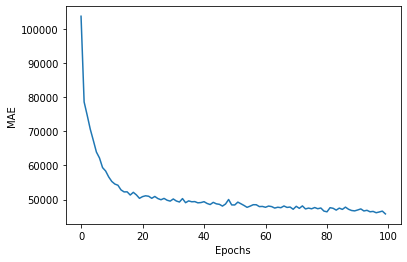

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

In [7]:
df_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

X_test = df_test.drop('median_house_value',axis=1)
y_test = df_test[['median_house_value']]

print(X_test.shape)
print(y_test.shape)

(3000, 8)
(3000, 1)


In [8]:
loss = model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 56618.6250


In [9]:
#melakukan prediksi
y_pred = model.predict(X_test)

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test.values, y_pred)
rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
mae = mean_absolute_error(y_test.values, y_pred)
mape = mean_absolute_percentage_error(y_test.values, y_pred)
nilai_r = r2_score(y_test.values, y_pred)

print('Nilai Mean Squared Error = {:.2f}'.format(mse))
print('Nilai Root Mean Squared Error = {:.2f}'.format(rmse))
print('Nilai Mean Absolute Error = {:.2f}'.format(mae))
print('Nilai Mean Absolute Percentage Error = {:.2f}'.format(mape))
print('Nilai R2 = {:.2f}'.format(nilai_r))

Nilai Mean Squared Error = 5468997581.59
Nilai Root Mean Squared Error = 73952.67
Nilai Mean Absolute Error = 56618.63
Nilai Mean Absolute Percentage Error = 0.37
Nilai R2 = 0.57


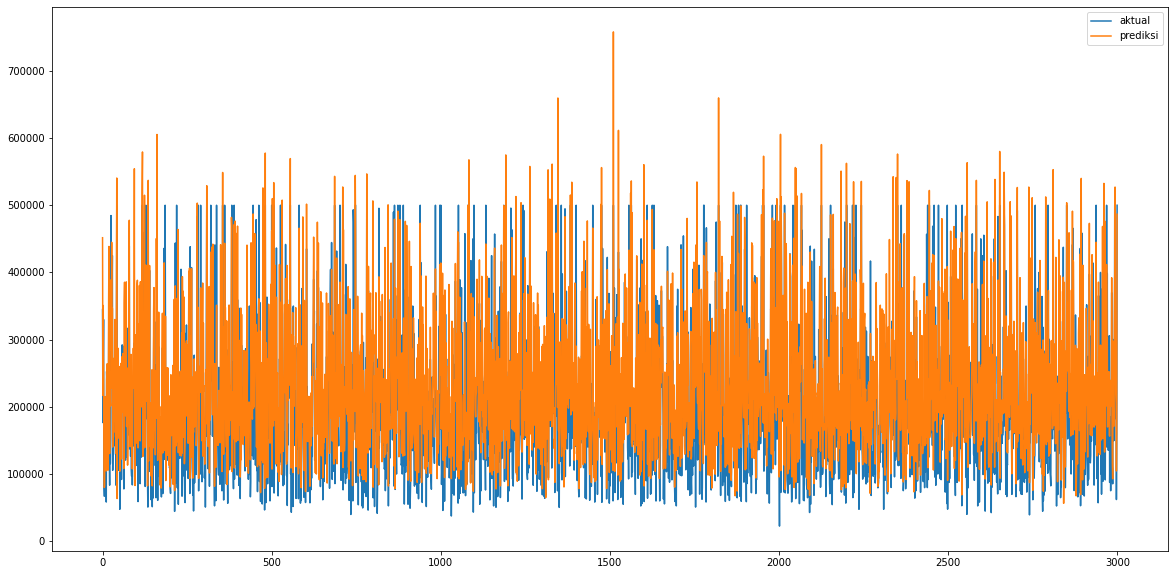

In [11]:
plt.figure(figsize=(20,10))
plt.plot(y_test.values, label='aktual')
plt.plot(y_pred, label='prediksi')
plt.legend()
plt.show()

##Klasifikasi

In [12]:
import pandas as pd

data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv'

df = pd.read_csv(data_url)
df.head()

,120,4,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [13]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.columns = [column_names]
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0
118,4.8,3.0,1.4,0.1,0


0: Iris setosa
1: Iris versicolor
2: Iris virginica

In [14]:
X = df.drop('species', axis=1)
y = df[['species']]

print(X.shape)
print(y.shape)

(120, 4)
(120, 1)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(108, 4) (108, 1)
(12, 4) (12, 1)


In [16]:
#Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_shape=(4,), activation='relu')) #Input Layer + Hidden 1
model.add(Dense(64, activation='relu')) #hidden 2
model.add(Dense(32, activation='relu')) #hidden 3
model.add(Dense(3, activation='softmax')) #output

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

sparse  | categorical
--- | ---
0 | 1 0 0
1 | 0 1 0
2 | 0 0 1

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                320       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 6,659
Trainable params: 6,659
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train, y_train,
                    validation_split=0.1,
                    epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 64ms/step - loss: 1.1511 - accuracy: 0.2268 - val_loss: 1.0382 - val_accuracy: 0.3636
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 1.0225 - accuracy: 0.6082 - val_loss: 0.9733 - val_accuracy: 0.6364
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.9579 - accuracy: 0.6907 - val_loss: 0.9129 - val_accuracy: 0.6364
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.9067 - accuracy: 0.6907 - val_loss: 0.8638 - val_accuracy: 0.6364
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.8628 - accuracy: 0.8144 - val_loss: 0.8331 - val_accuracy: 0.7273
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.8321 - accuracy: 0.6701 - val_loss: 0.7963 - val_accuracy: 0.6364
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7774 - accuracy: 0.7732 - val_loss: 0.7347 - val_accuracy: 0.9091
Epoch 8/100
4/4 [===

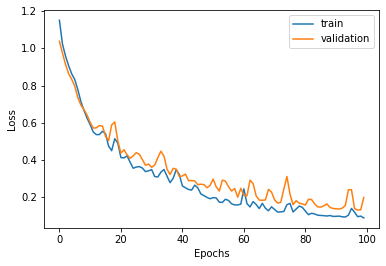

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

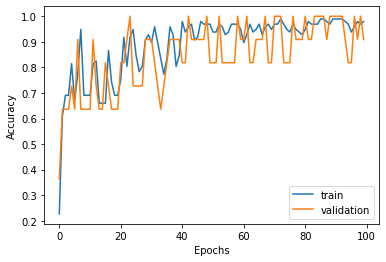

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
loss = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 22ms/step - loss: 0.0349 - accuracy: 1.0000


In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred[:5]

array([[9.9932754e-01, 6.7240081e-04, 1.0489678e-07],
       [2.8226836e-07, 3.3077903e-03, 9.9669194e-01],
       [9.9739230e-01, 2.6070231e-03, 6.9962471e-07],
       [1.7517827e-03, 9.9198228e-01, 6.2658773e-03],
       [4.8810033e-08, 2.0282245e-03, 9.9797171e-01]], dtype=float32)

In [24]:
import numpy as np

pred_label = np.argmax(y_pred, axis=1)
print(pred_label[:5])
print(y_test.values[:5].flatten())

[0 2 0 1 2]
[0 2 0 1 2]


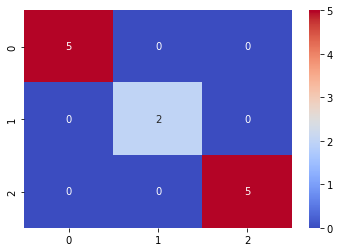

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred_label)

sns.heatmap(cm,annot=True,cmap='coolwarm',fmt="g")

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_label))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

